### Feature Selection using LASSO

In [1]:
from sklearn import datasets
import pandas as pd

df = pd.read_csv('../DataSets/diabetes.csv')

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:-1],df.iloc[:,-1],test_size=0.2,random_state=1)

In [3]:
X_train.shape

(614, 8)

In [4]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
663,9,145,80,46,130,37.9,0.637,40
712,10,129,62,36,0,41.2,0.441,38
161,7,102,74,40,105,37.2,0.204,45
509,8,120,78,0,0,25.0,0.409,64
305,2,120,76,37,105,39.7,0.215,29


Scaling the features is an important step in linear regression models, especially when using regularization techniques like LASSO (Least Absolute Shrinkage and Selection Operator). 

LASSO can help in feature selection by shrinking some coefficients to zero, effectively removing those features from the model.

In [5]:
from sklearn.preprocessing import StandardScaler

cols = X_train.columns

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled,columns=cols)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=cols)

In [6]:
X_train_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1.516591,0.750524,0.564756,1.652015,0.437496,0.795825,0.529526,0.567932
1,1.812018,0.244752,-0.347904,1.020973,-0.678474,1.228654,-0.069689,0.398450
2,0.925736,-0.608739,0.260536,1.273390,0.222886,0.704013,-0.794249,0.991638
3,1.221164,-0.039745,0.463350,-1.250779,-0.678474,-0.896139,-0.167519,2.601722
4,-0.551400,-0.039745,0.361943,1.084077,0.222886,1.031914,-0.760619,-0.364222


In [7]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)

lasso.fit(X_train_scaled, y_train)

,"alpha alpha: float, default=1.0Constant that multiplies the L1 term, controlling regularizationstrength. `alpha` must be a non-negative float i.e. in `[0, inf)`.When `alpha = 0`, the objective is equivalent to ordinary leastsquares, solved by the :class:`LinearRegression` object. For numericalreasons, using `alpha = 0` with the `Lasso` object is not advised.Instead, you should use the :class:`LinearRegression` object.",0.1
,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"precompute precompute: bool or array-like of shape (n_features, n_features), default=FalseWhether to use a precomputed Gram matrix to speed upcalculations. The Gram matrix can also be passed as argument.For sparse input this option is always ``False`` to preserve sparsity.",False
,"copy_X copy_X: bool, default=TrueIf ``True``, X will be copied; else, it may be overwritten.",True
,"max_iter max_iter: int, default=1000The maximum number of iterations.",1000
,"tol tol: float, default=1e-4The tolerance for the optimization: if the updates are smaller or equal to``tol``, the optimization code checks the dual gap for optimality and continuesuntil it is smaller or equal to ``tol``, see Notes below.",0.0001
,"warm_start warm_start: bool, default=FalseWhen set to ``True``, reuse the solution of the previous call to fit asinitialization, otherwise, just erase the previous solution.See :term:`the Glossary `.",False
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive.",False
,"random_state random_state: int, RandomState instance, default=NoneThe seed of the pseudo random number generator that selects a randomfeature to update. Used when ``selection`` == 'random'.Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",None
,"selection selection: {'cyclic', 'random'}, default='cyclic'If set to 'random', a random coefficient is updated every iterationrather than looping over features sequentially by default. This(setting to 'random') often leads to significantly faster convergenceespecially when tol is higher than 1e-4.",'cyclic'


In [8]:
lasso.coef_

array([ 0.        ,  0.1267733 , -0.        ,  0.        ,  0.        ,
        0.00480181,  0.        ,  0.        ])

<Axes: >

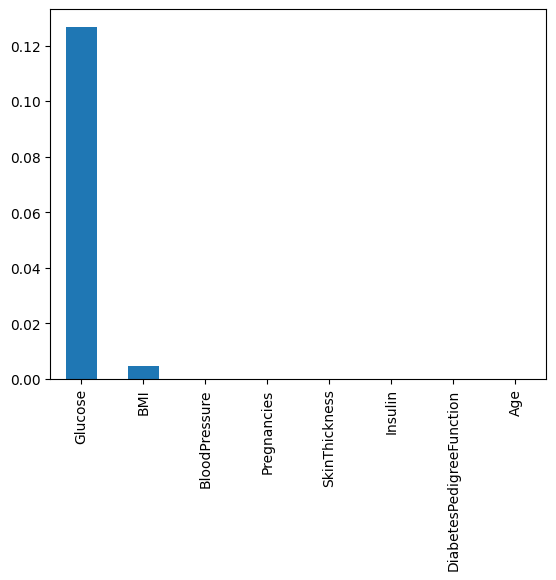

In [9]:
import matplotlib.pyplot as plt
import numpy as np

x = pd.Series(np.abs(lasso.coef_),index=cols)

x.sort_values(ascending=False).plot(kind='bar')

### Feature Selection using Decision Tree

In [10]:
from sklearn import datasets
import pandas as pd

df = pd.read_csv('../DataSets/diabetes.csv')

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:-1],df.iloc[:,-1],test_size=0.2,random_state=1)

In [12]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
663,9,145,80,46,130,37.9,0.637,40
712,10,129,62,36,0,41.2,0.441,38
161,7,102,74,40,105,37.2,0.204,45
509,8,120,78,0,0,25.0,0.409,64
305,2,120,76,37,105,39.7,0.215,29


In [13]:
from pandas.core.common import random_state
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

#dt.fit(X_train,y_train)
rf.fit(X_train,y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [14]:
rf.feature_importances_

array([0.07912305, 0.25689665, 0.09130402, 0.06999712, 0.08010599,
       0.16798535, 0.12313582, 0.13145199])

<Axes: >

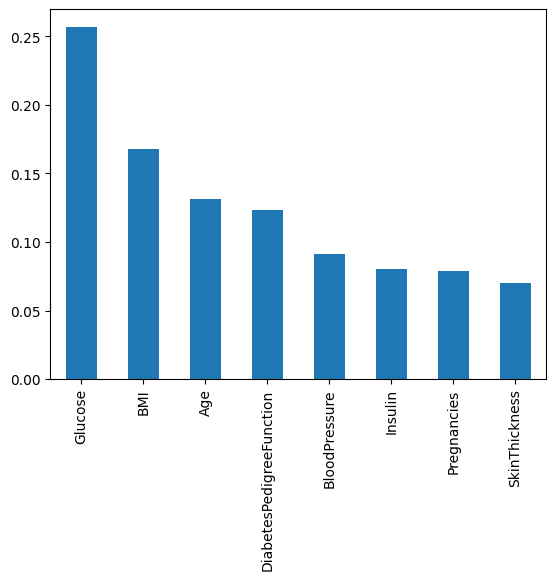

In [15]:
cols = X_train.columns

x = pd.Series(np.abs(rf.feature_importances_),index=cols)

x.sort_values(ascending=False).plot(kind='bar')

### SelectFromModel

- SelectFromModel is a meta-transformer for selecting features based on importance weights. It can be used with any estimator that has a `coef_` or `feature_importances_` attribute after fitting.
- it is the formal method for feature selection using embedded methods, as it allows you to select features based on the importance weights of a fitted model.
- The `threshold` parameter can be set to a specific value, or it can be set to 'mean' or 'median' to use the mean or median of the feature importance weights as the threshold for feature selection.


In [16]:
from sklearn import datasets
import pandas as pd

df = pd.read_csv('../DataSets/diabetes.csv')

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:-1],df.iloc[:,-1],test_size=0.2,random_state=1)

In [17]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

In [18]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(model, threshold='mean')

In [19]:
sfm.fit(X_train, y_train)

,"estimator estimator: objectThe base estimator from which the transformer is built.This can be both a fitted (if ``prefit`` is set to True)or a non-fitted estimator. The estimator should have a``feature_importances_`` or ``coef_`` attribute after fitting.Otherwise, the ``importance_getter`` parameter should be used.",DecisionTreeClassifier()
,"threshold threshold: str or float, default=NoneThe threshold value to use for feature selection. Features whoseabsolute importance value is greater or equal are kept while the othersare discarded. If ""median"" (resp. ""mean""), then the ``threshold`` valueis the median (resp. the mean) of the feature importances. A scalingfactor (e.g., ""1.25*mean"") may also be used. If None and if theestimator has a parameter penalty set to l1, either explicitlyor implicitly (e.g, Lasso), the threshold used is 1e-5.Otherwise, ""mean"" is used by default.",'mean'
,"prefit prefit: bool, default=FalseWhether a prefit model is expected to be passed into the constructordirectly or not.If `True`, `estimator` must be a fitted estimator.If `False`, `estimator` is fitted and updated by calling`fit` and `partial_fit`, respectively.",False
,"norm_order norm_order: non-zero int, inf, -inf, default=1Order of the norm used to filter the vectors of coefficients below``threshold`` in the case where the ``coef_`` attribute of theestimator is of dimension 2.",1
,"max_features max_features: int, callable, default=NoneThe maximum number of features to select.- If an integer, then it specifies the maximum number of features to allow.- If a callable, then it specifies how to calculate the maximum number of features allowed. The callable will receive `X` as input: `max_features(X)`.- If `None`, then all features are kept.To only select based on ``max_features``, set ``threshold=-np.inf``... versionadded:: 0.20.. versionchanged:: 1.1 `max_features` accepts a callable.",None
,"importance_getter importance_getter: str or callable, default='auto'If 'auto', uses the feature importance either through a ``coef_``attribute or ``feature_importances_`` attribute of estimator.Also accepts a string that specifies an attribute name/pathfor extracting feature importance (implemented with `attrgetter`).For example, give `regressor_.coef_` in case of:class:`~sklearn.compose.TransformedTargetRegressor` or`named_steps.clf.feature_importances_` in case of:class:`~sklearn.pipeline.Pipeline` with its last step named `clf`.If `callable`, overrides the default feature importance getter.The callable is passed with the fitted estimator and it shouldreturn importance for each feature... versionadded:: 0.24",'auto'
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each 

In [20]:
sfm.get_support(indices=True)

array([1, 5, 6])

In [21]:
sfm.feature_names_in_[sfm.get_support(indices=True)]

array(['Glucose', 'BMI', 'DiabetesPedigreeFunction'], dtype=object)

In [22]:
X_train_trans = sfm.transform(X_train)

X_train_trans = pd.DataFrame(X_train_trans,columns=sfm.feature_names_in_[sfm.get_support(indices=True)])

X_train_trans

,Glucose,BMI,DiabetesPedigreeFunction
0,145.0,37.9,0.637
1,129.0,41.2,0.441
2,102.0,37.2,0.204
3,120.0,25.0,0.409
4,120.0,39.7,0.215
...,...,...,...
609,157.0,39.4,0.134
610,187.0,33.9,0.826
611,126.0,43.4,0.583
612,171.0,43.6,0.479


## Recursive Feature Selection

- It can also be called as an hybrid method as it combines the advantages of both filter and wrapper methods. It uses the model's performance to evaluate the importance of features so it is a wrapper method, but it also eliminates features based on their importance scores, which is a characteristic of filter methods.

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns

In [24]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [25]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [26]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [27]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X,y)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [43]:
rf.feature_importances_

array([0.10946625, 0.0232877 , 0.43370485, 0.4335412 ])

In [44]:
X.drop(columns='sepal_width',inplace=True)
X.head()

,sepal_length,petal_length,petal_width
0,5.1,1.4,0.2
1,4.9,1.4,0.2
2,4.7,1.3,0.2
3,4.6,1.5,0.2
4,5.0,1.4,0.2


In [45]:
rf = RandomForestClassifier()
rf.fit(X,y)

rf.feature_importances_ 

array([0.19845611, 0.43793282, 0.36361107])

In [46]:
X.drop(columns='sepal_length',inplace=True)
X.head()

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [48]:
rf = RandomForestClassifier()
rf.fit(X,y)

rf.feature_importances_

array([0.42390351, 0.57609649])

In [49]:
X.drop(columns='petal_length',inplace=True)
X.head()

,petal_width
0,0.2
1,0.2
2,0.2
3,0.2
4,0.2


So , Recursive Feature Elimination (RFE) is a feature selection method that fits a model and removes the weakest feature (or features) until the specified number of features is reached. It is a wrapper method that uses the model's performance to evaluate the importance of features.

- It works by recursively fitting the model and eliminating the least important features based on the model's coefficients or feature importance scores.

### **Sklearn RFE**

- using the `RFE` class from `sklearn.feature_selection`, you can perform recursive feature elimination. You need to specify the estimator (model) you want to use for fitting, the number of features to select, and optionally the step size for eliminating features.

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load iris dataset
df = sns.load_dataset('iris')

# Separate features and target variable
X = df.drop("species", axis=1)
y = df["species"]

# Initialize RandomForestClassifier
model = RandomForestClassifier()

# Initialize RFE
rfe = RFE(estimator=model, n_features_to_select=1)

# Fit RFE
rfe.fit(X, y)

# Print the ranking
ranking = rfe.ranking_
print("Feature ranking:")

for i, feature in enumerate(X.columns):
    print(f"{feature}: {ranking[i]}")

# The feature with rank 1 is the most important, and the feature with rank 4 is the least important.

Feature ranking:
sepal_length: 3
sepal_width: 4
petal_length: 1
petal_width: 2


## **RFECV**
It is a variant of RFE that performs cross-validation to find the optimal number of features. It automatically tunes the number of features to select based on the model's performance on the validation set.

It is beneficial when you are unsure about the optimal number of features to select, as it uses cross-validation to evaluate the model's performance for different numbers of features and selects the best one.

In [65]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load iris dataset
df = sns.load_dataset('iris')

# Separate features and target variable
X = df.drop("species", axis=1)
y = df["species"]

# Initialize RandomForestClassifier
model = RandomForestClassifier()

# Initialize RFE
rfecv = RFECV(estimator=model, step=1, cv=5)

# Fit RFE
rfecv.fit(X, y)

# Print the ranking
ranking = rfecv.ranking_
print("Feature ranking:")

for i, feature in enumerate(X.columns):
    print(f"{feature}: {ranking[i]}")

# The feature with rank 1 is the most important, and the feature with rank 4 is the least important.

Feature ranking:
sepal_length: 2
sepal_width: 3
petal_length: 1
petal_width: 1


In [66]:
rfecv.n_features_       # it the the number of features selected by RFECV based on the model's performance on the validation set. It indicates the optimal number of features to select.

np.int64(2)

**Trying out sth**

In [67]:
# Before fitting
rfe_cv = RFECV(estimator=model, min_features_to_select=1)  # You can set minimum threshold
rfe_cv.fit(X, y)

,estimator estimator: ``Estimator`` instanceA supervised learning estimator with a ``fit`` method that providesinformation about feature importance either through a ``coef_``attribute or through a ``feature_importances_`` attribute.,RandomForestClassifier()
,"step step: int or float, default=1If greater than or equal to 1, then ``step`` corresponds to the(integer) number of features to remove at each iteration.If within (0.0, 1.0), then ``step`` corresponds to the percentage(rounded down) of features to remove at each iteration.Note that the last iteration may remove fewer than ``step`` features inorder to reach ``min_features_to_select``.",1
,"min_features_to_select min_features_to_select: int, default=1The minimum number of features to be selected. This number of featureswill always be scored, even if the difference between the originalfeature count and ``min_features_to_select`` isn't divisible by``step``... versionadded:: 0.20",1
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross-validation,- integer, to specify the number of folds.- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if ``y`` is binary or multiclass,:class:`~sklearn.model_selection.StratifiedKFold` is used. If theestimator is not a classifier or if ``y`` is neither binary nor multiclass,:class:`~sklearn.model_selection.KFold` is used.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value of None changed from 3-fold to 5-fold.",None
,"scoring scoring: str or callable, default=NoneScoring method to evaluate the :class:`RFE` selectors' performance. Options:- str: see :ref:`scoring_string_names` for options.- callable: a scorer callable object (e.g., function) with signature ``scorer(estimator, X, y)``. See :ref:`scoring_callable` for details.- `None`: the `estimator`'s :ref:`default evaluation criterion ` is used.",None
,"verbose verbose: int, default=0Controls verbosity of output.",0
,"n_jobs n_jobs: int or None, default=NoneNumber of cores to run in parallel while fitting across folds.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionadded:: 0.18",None
,"importance_getter importance_getter: str or callable, default='auto'If 'auto', uses the feature importance either through a `coef_`or `feature_importances_` attributes of estimator.Also accepts a string that specifies an attribute name/pathfor extracting feature importance.For example, give `regressor_.coef_` in case of:class:`~sklearn.compose.TransformedTargetRegressor` or`named_steps.clf.feature_importances_` in case of:class:`~sklearn.pipeline.Pipeline` with its last step named `clf`.If `callable`, overrides the default feature importance getter.The callable is passed with the fitted estimator and it shouldreturn importance for each feature... versionadded:: 0.24",'auto'
,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None


In [ ]:
# After fitting
rfe_cv.n_features_ # This tells you the optimal number of 

np.int64(2)

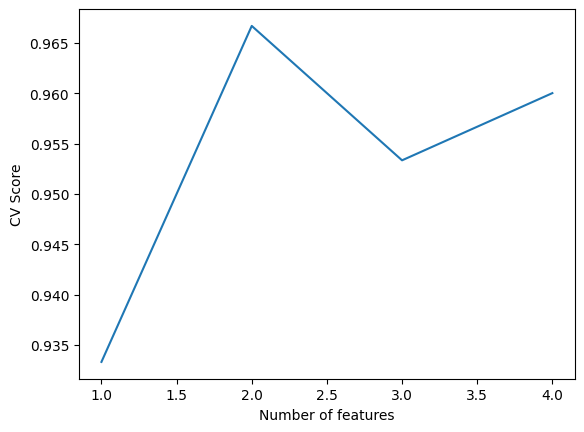

Optimal features: 2


In [69]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), 
         rfecv.cv_results_['mean_test_score'])
plt.xlabel('Number of features')
plt.ylabel('CV Score')
plt.show()

print(f"Optimal features: {rfecv.n_features_}")  # The peak of the curve

In [1]:
import pandas as pd

data = {
    'A': ['a1', 'a2', 'a1', 'a1', 'a2', 'a1', 'a2', 'a2'],
    'B': ['b1', 'b2', 'b2', 'b1', 'b1', 'b2', 'b2', 'b1']
}

df = pd.DataFrame(data)


In [3]:
marginal_prob = pd.crosstab(df['A'], df['B'], margins=True, normalize='all')
marginal_prob
# here in the crosstab, the 'All' row and column represent the marginal probabilities of A and B, respectively. 
# The values in the 'All' row show the probability distribution of A, while the values in the 'All' column show 
# the probability distribution of B. The other cells represent the joint probabilities of A and B occurring together.

B,b1,b2,All
A,,,
a1,0.25,0.25,0.5
a2,0.25,0.25,0.5
All,0.50,0.50,1.0


In [37]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.datasets import load_iris
import pandas as pd

# Load iris dataset
iris = load_iris()
X = iris['data']
y = iris['target']

# Compute mutual information
mi = mutual_info_classif(X, y)

# Print mutual information
for i, mi_value in enumerate(mi):
    print(f"Feature {i}: Mutual Information = {mi_value}")


Feature 0: Mutual Information = 0.514620926054461
Feature 1: Mutual Information = 0.26595322769050744
Feature 2: Mutual Information = 0.9966225925555734
Feature 3: Mutual Information = 0.987297085883305


In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.datasets import load_iris

# Load iris dataset
iris = load_iris()
X = iris['data']
y = iris['target']

# Create SelectKBest feature selector
selector = SelectKBest(mutual_info_classif, k=2)

# Fit and transform
X_new = selector.fit_transform(X, y)        # we did both fit : fit computes the mutual information scores for each feature and selects the top k features based on those scores. 
                                            # and transform then reduces the dataset to only those selected features.

# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)

print(iris.feature_names)
print(cols)


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[2 3]
